# Task 1

A template code for calculating FCFs for $H_2$ - $H_2^+$ using the harmonic oscillator approximation. 

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FCF_helper import FCFSpec

Initialize the `FCFSpec` object. Modify `n_0_max` and `n_p_max` (the maximum vibrational states of $H_2$ and $H_2^+$ that we'll look at calculating FCFs for) in order to get 10 transitions starting from n_0=0.

In [2]:
n_0_max = 0
n_p_max = 10

fcfspec = FCFSpec(n_0_max, n_p_max)

Calculate all the FCFs and print the results.

In [3]:
spectrum = fcfspec.spectrum_analysis()
print("n_0\t\t n_p\t\t\t FCF \t\t Ep - E0")
print(spectrum)

n_0		 n_p			 FCF 		 Ep - E0
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.23378957e+05]
 [0.00000000e+00 1.00000000e+00 2.95139079e+00 1.25700957e+05]
 [0.00000000e+00 2.00000000e+00 3.49048846e+00 1.28022957e+05]
 [0.00000000e+00 3.00000000e+00 2.01446220e+00 1.30344957e+05]
 [0.00000000e+00 4.00000000e+00 5.16711333e-01 1.32666957e+05]
 [0.00000000e+00 5.00000000e+00 2.55047939e-02 1.34988957e+05]
 [0.00000000e+00 6.00000000e+00 8.26500159e-03 1.37310957e+05]
 [0.00000000e+00 7.00000000e+00 1.09734335e-02 1.39632957e+05]
 [0.00000000e+00 8.00000000e+00 1.39346082e-03 1.41954957e+05]
 [0.00000000e+00 9.00000000e+00 8.39894919e-05 1.44276957e+05]
 [0.00000000e+00 1.00000000e+01 2.53763959e-04 1.46598957e+05]]


In [4]:
FCF = []
Ep_E0 = []
EpE0_gauss = []
k = 8065.54429 # convert to eV

for index in range(len(spectrum)):
    FCF.append(spectrum[index][2])
    Ep_E0.append(spectrum[index][3] / k)
print('FCF{}'.format(FCF))
print('Ep_E0{}'.format(Ep_E0))

FCF[1.0, 2.951390788936749, 3.4904884601401744, 2.014462201827329, 0.5167113333292207, 0.025504793875624196, 0.008265001585994098, 0.010973433460970622, 0.0013934608245199632, 8.398949185926623e-05, 0.0002537639593145838]
Ep_E0[15.297040418334866, 15.584931714509251, 15.872823010683634, 16.16071430685802, 16.4486056030324, 16.736496899206784, 17.02438819538117, 17.312279491555554, 17.600170787729937, 17.88806208390432, 18.175953380078706]


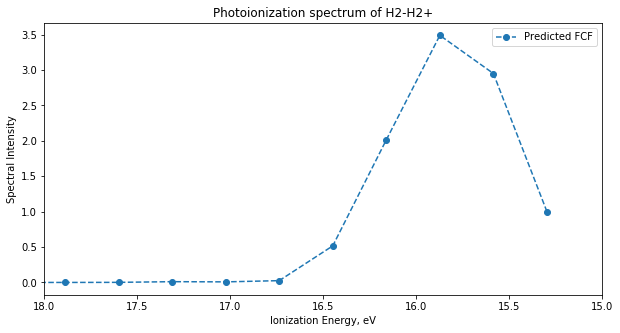

In [5]:
plt.figure(figsize=(10,5))
plt.xlim(18, 15)
plt.xlabel('Ionization Energy, eV')
plt.ylabel('Spectral Intensity')
plt.title("Photoionization spectrum of H2-H2+")
plt.plot( Ep_E0, FCF, marker="o", linestyle='dashed', label="Predicted FCF")
plt.legend()
plt.show()

In [6]:
print("Franck-Condon Coefficient (vibrational state n0=0): {},  Spectral Intensity: {}".format(FCF[0], Ep_E0[0]))
print("Franck-Condon Coefficient (vibrational state np=10): {}, Spectral Intensity: {}".format(FCF[9], Ep_E0[9]))

Franck-Condon Coefficient (vibrational state n0=0): 1.0,  Spectral Intensity: 15.297040418334866
Franck-Condon Coefficient (vibrational state np=10): 8.398949185926623e-05, Spectral Intensity: 17.88806208390432


We will fit the data to the Gaussian fit function in order to evaluate the photoionization spectrum of $H_2$ - $H_2^+$.

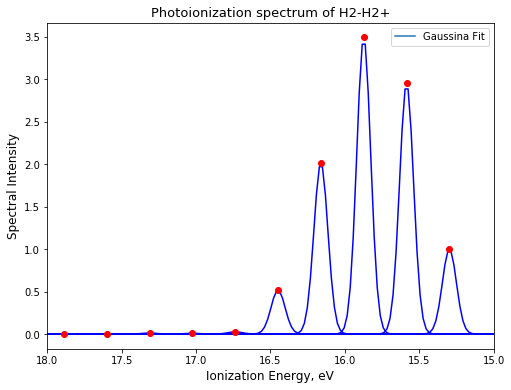

In [7]:
# gaussian fit function
def gauss(x,x0,y0,sigma):
    '''
    The Gaussian function
    y = y0*Exp(-0.5*((x-x0)/sigma)**2)
    Parameters:
        x0: The position of the peak
        y0: the intensity of the peak
        sigma: The width of the Gaussian
    Returns:
        The gaussian evaluated at x
    '''
    return y0*np.exp(-0.09* ((x-x0)/sigma)**2)

# plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_xlim(18, 15)  # decreasing energy
ax.set_xlabel('Ionization Energy, eV', fontsize=12)
ax.set_ylabel('Spectral Intensity', fontsize=12)
ax.set_title('Photoionization spectrum of H2-H2+', fontsize=13)
for i in range(len(FCF)):
    start = Ep_E0[i] - 1
    stop = Ep_E0[i] + 1
    x_dummy = np.linspace(start=start, stop=stop, num=100)
    y_dummy = gauss(x_dummy, Ep_E0[i], FCF[i], 0.020)
    ax.plot(x_dummy, y_dummy, color='blue')
ax.plot(0,0, linestyle=None, label='Gaussina Fit')
ax.plot( Ep_E0, FCF, marker="o", linestyle='None', color='red')
plt.legend()
plt.show()

One can clearly see the vibronic transitions with highly intenive spectrums which correspond to high FCF. The photonization spectrum obtained correspond to the theory.